In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from prettytable import PrettyTable 
import warnings
warnings.filterwarnings('ignore') #Importing the necessary libraries

In [2]:
Data=pd.read_csv("Car Pricing Details.csv")

In [66]:
Data.head()

,Name,Kilometer,Fuel,Location,EMI,Price
0,163,102,2,14,86,60
1,122,223,0,5,85,41
2,9,113,1,14,68,59
3,86,210,1,6,62,34
4,72,55,2,5,23,28


In [5]:
Data.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
Data.shape # Checking the shape

(2752, 6)

In [8]:
Data.columns # Checking the columns

Index(['Name', 'Kilometer', 'Fuel', 'Location', 'EMI', 'Price'], dtype='object')

In [9]:
Data.info() # Checking the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       2752 non-null   object
 1   Kilometer  2752 non-null   object
 2   Fuel       2752 non-null   object
 3   Location   2752 non-null   object
 4   EMI        2752 non-null   object
 5   Price      2752 non-null   object
dtypes: object(6)
memory usage: 129.1+ KB


In [10]:
Data.isnull().sum() # To check null values

Name         0
Kilometer    0
Fuel         0
Location     0
EMI          0
Price        0
dtype: int64

In [12]:
Data['Name'].value_counts()

MG Hector Sharp 1.5 DCT Petrol [2019-2020]          77
Honda City V Petrol [2017-2019]                     55
Ford EcoSport Titanium 1.5L Ti-VCT                  55
Hyundai Creta SX 1.6 AT Petrol                      44
Kia Seltos GTX Plus AT 1.4 [2019-2020]              44
                                                    ..
Toyota Innova Crysta 2.8 ZX AT 7 STR [2016-2020]    11
MINI Cooper JCW Hatchback                           11
Toyota Innova Crysta 2.4 ZX 7 STR [2016-2020]       11
Toyota Innova Crysta 2.4 G 8 STR [2016-2017]        11
Mahindra Alturas G4 4WD AT [2018-2020]              11
Name: Name, Length: 188, dtype: int64

In [13]:
# Total number of MG Hector sharp is more than other cars

<AxesSubplot:xlabel='Fuel', ylabel='count'>

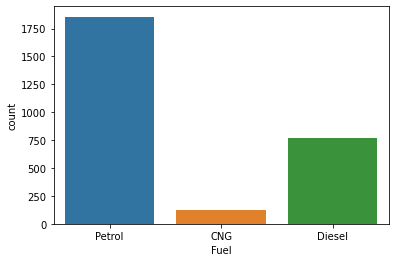

In [15]:
sns.countplot(Data['Fuel'])

<AxesSubplot:xlabel='Location', ylabel='count'>

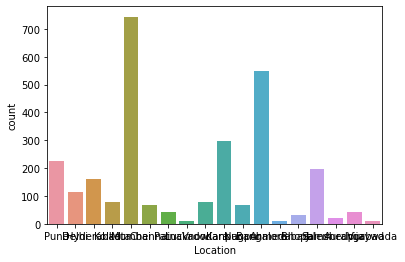

In [18]:
sns.countplot(Data['Location'])

In [19]:
Data['Location'].value_counts()

Mumbai        744
Bangalore     550
Kanpur        297
Pune          224
Salem         198
Hyderabad     162
Delhi         113
Kolkata        78
Vadodara       77
Chennai        67
Nagpur         66
Patna          44
Aurangabad     44
Bhopal         33
Jamshedpur     22
Lucknow        11
Ahmedabad      11
Vijaywada      11
Name: Location, dtype: int64

In [20]:
# Maximum number of cars are from Mumbai Location

In [21]:
enc= LabelEncoder() #Encoding the object data type

In [23]:
columns=['Name','Kilometer','Fuel','Location','EMI','Price']
Data[columns] = Data[columns].apply(enc.fit_transform) #Encoding the object data type into int data type

In [24]:
Data 

,Name,Kilometer,Fuel,Location,EMI,Price
0,163,102,2,14,86,60
1,122,223,0,5,85,41
2,9,113,1,14,68,59
3,86,210,1,6,62,34
4,72,55,2,5,23,28
...,...,...,...,...,...,...
2747,115,36,2,11,115,124
2748,120,32,0,11,84,105
2749,65,162,2,11,0,92
2750,45,194,2,4,104,66


In [25]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Name       2752 non-null   int32
 1   Kilometer  2752 non-null   int32
 2   Fuel       2752 non-null   int32
 3   Location   2752 non-null   int32
 4   EMI        2752 non-null   int32
 5   Price      2752 non-null   int32
dtypes: int32(6)
memory usage: 64.6 KB


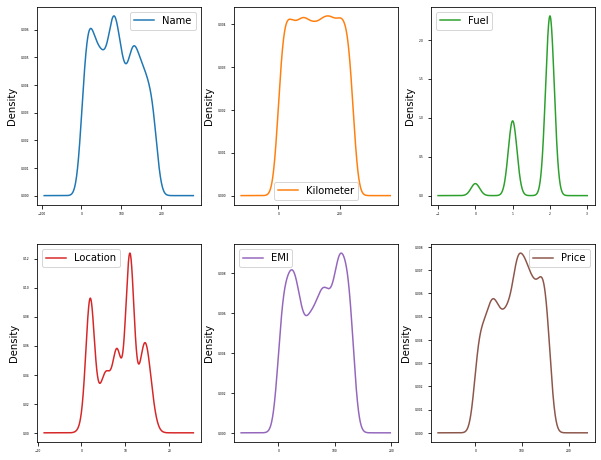

In [29]:
Data.plot(kind='kde',subplots=True,layout=(2,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [30]:
# Data is skewed

In [31]:
Data.skew().sort_values(ascending=False) #checking the skewness

Name         0.106926
Kilometer   -0.003635
EMI         -0.079938
Price       -0.170924
Location    -0.189716
Fuel        -1.254091
dtype: float64

In [32]:
from sklearn.preprocessing import power_transform

In [33]:
New_Data=power_transform(Data)

In [34]:
pd.DataFrame(New_Data,columns=Data.columns).skew().sort_values(ascending=False) # transforming the data to reduce skewness

Name        -0.238199
Location    -0.262248
Kilometer   -0.280738
EMI         -0.305570
Price       -0.314064
Fuel        -0.769798
dtype: float64

In [68]:
Data=pd.DataFrame(New_Data,columns=Data.columns)

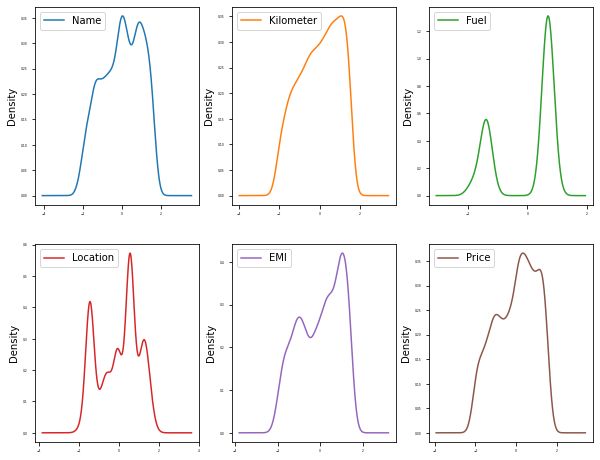

In [70]:
Data.plot(kind='kde',subplots=True,layout=(2,3),sharex=False,legend=True,fontsize=3,figsize=(10,8))
plt.show() # ploting the data and observing high skewness

In [71]:
X= Data.drop('Price',axis=1)
Y= Data['Price'] #dividing the feature and target variable

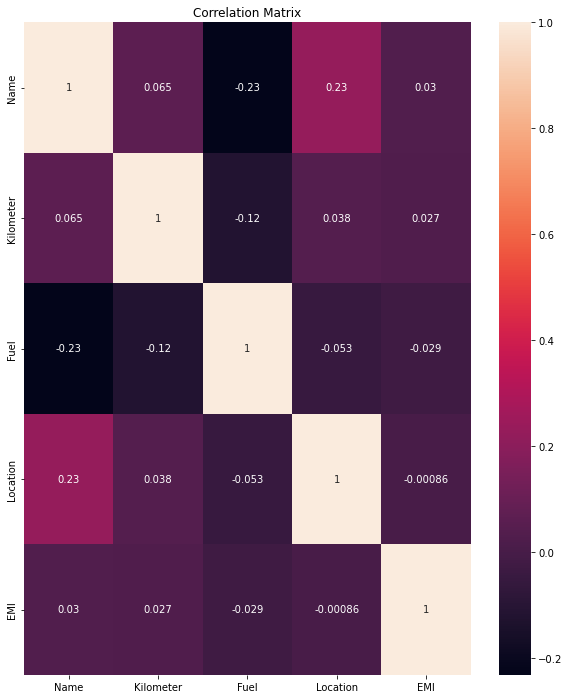

In [72]:
corr_mat=X.corr()
plt.figure(figsize=[10,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show() #Checking correlation

In [39]:
# There is absolutely no correlation on the features provided

In [73]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

vif_data

,feature,VIF
0,Name,1.112584
1,Kilometer,1.016852
2,Fuel,1.069319
3,Location,1.054684
4,EMI,1.001953


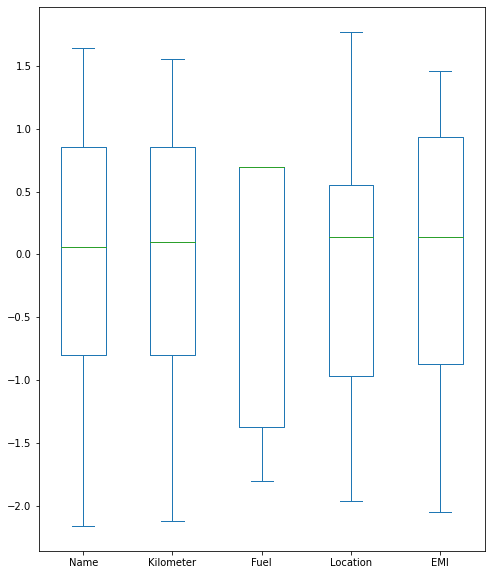

In [74]:
X.plot(kind='box',figsize=(8,10),layout=(4,3))
plt.show() #checking for oultiers

In [75]:
from scipy.stats import zscore

In [76]:
(np.abs(zscore(X)<3)).all()

Name         True
Kilometer    True
Fuel         True
Location     True
EMI          True
dtype: bool

In [77]:
# There is no Outliers present

In [78]:
Scalar=StandardScaler()

In [79]:
X_Scaled=Scalar.fit_transform(X)
X_Scaled

array([[ 1.30335468, -0.1651872 ,  0.69232658,  1.169651  ,  0.50093715],
       [ 0.68237518,  1.34569011, -1.80337293, -0.74085935,  0.47868891],
       [-1.72006883, -0.0121331 , -1.37479261,  1.169651  ,  0.08867915],
       ...,
       [-0.31814124,  0.62496062,  0.69232658,  0.55445741, -2.05401882],
       [-0.7355369 ,  1.01113316,  0.69232658, -0.96945725,  0.89037018],
       [-0.12600824, -1.02088189,  0.69232658,  0.55445741,  1.36239217]])

# Linear Regression

In [80]:
LR=LinearRegression()

In [81]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
LR.fit(X_train,y_train)
pred_test=LR.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: -0.2585450144481083


# Decision Tree Regressor

In [82]:
DT=DecisionTreeRegressor()

In [83]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
DT.fit(X_train,y_train)
pred_test=DT.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 100.0


# Random Forest Regressor

In [84]:
rf=RandomForestRegressor()

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
rf.fit(X_train,y_train)
pred_test=rf.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 99.9827439963225


# Gradient Boosting

In [86]:
GB=GradientBoostingRegressor()

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X_Scaled,Y,test_size=0.20,random_state=50)
GB.fit(X_train,y_train)
pred_test=GB.predict(X_test)


print('R-Squared:',r2_score(y_test,pred_test)*100)

R-Squared: 83.43835601351172


### As score for Linear Regression is extremely poor hence only taking Decision Tree, Gradient Boosting and Random Forest Regressor for cross validation

# Cross Validation for DT

In [88]:
for i in range(2,6):
    DT_Val=cross_val_score(DT,X_Scaled,Y,cv=i)
    print("The cross validation score for Decision Tree Regressor",i,"is",DT_Val.mean())

The cross validation score for Decision Tree Regressor 2 is 1.0
The cross validation score for Decision Tree Regressor 3 is 1.0
The cross validation score for Decision Tree Regressor 4 is 1.0
The cross validation score for Decision Tree Regressor 5 is 1.0


# Cross Validation for RF

In [63]:
for i in range(2,6):
    RF_Val=cross_val_score(rf,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",RF_Val.mean()*100)

The cross validation score for 2 is 99.76139112656959
The cross validation score for 3 is 99.97862258015583
The cross validation score for 4 is 99.98929143559769
The cross validation score for 5 is 99.9925685478573


# Cross Validation for GB

In [89]:
for i in range(2,6):
    GB_Val=cross_val_score(GB,X_Scaled,Y,cv=i)
    print("The cross validation score for",i,"is",GB_Val.mean()*100)

The cross validation score for 2 is 82.48519788780038
The cross validation score for 3 is 82.6144004427058
The cross validation score for 4 is 82.73572552686163
The cross validation score for 5 is 83.27377037662131


### From the above data, it can be seen that none of the models are overfitted and Decision Tree is the best model for this dataset with a R2 score of 100%

### As the score is already 100, hence hyper parameter tuning is not performed

# Saving the model

In [65]:
import pickle
filename='Car Price Prediction.pkl'
pickle.dump(DT,open(filename,'wb')) ##saving the model